In [3]:
using Pkg
Pkg.add("MAT")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
  Installed Lz4_jll ───────── v1.9.2+2
  Installed FFMPEG_jll ────── v4.3.1+4
  Installed Zstd_jll ──────── v1.4.5+1
  Installed Blosc_jll ─────── v1.14.3+1
  Installed HDF5 ──────────── v0.13.6
  Installed Blosc ─────────── v0.7.0
  Installed MAT ───────────── v0.8.1
  Installed HDF5_jll ──────── v1.10.5+6
  Installed BufferedStreams ─ v1.0.0
######################################################################### 100.0%#=#=-#  #                                                                      
######################################################################### 100.0%-#O#- #   #                                                                    
######################################################################### 100.0%-#O#- #   #                                                                    
######################################################################### 100.0%#=#=-#  #                                                     

In [29]:
using MAT
using Printf

In [127]:
datadir="../data_RGCs/"
function readmat(filename::String)
    file=matopen(join([datadir,filename,".mat"]))
    Stim=read(file,filename)
    close(file)
    return Stim
end

Stim=readmat("Stim")
stimtimes=readmat("stimtimes")
SpTimes=readmat("SpTimes");

In [128]:
cellnum=3 #(1-2 are OFF cells; 3-4 are ON cells).
tsp=SpTimes[cellnum];

In [129]:
dtStim=stimtimes[2]-stimtimes[1] # time bin size for stimulus(s)
RefreshRate=1/dtStim # Refresh rate of the monitor
nT=size(Stim)[1] # stim frame times in seconds (if desired)
nsp=size(tsp)[1]; # load spike times (in units of stim frames)

In [130]:
@printf("--------------------------\n")
@printf("Loaded RGC data: cell %d\n",cellnum)
@printf("Number of stim frames: %d  (%.1f minutes)\n",nT, nT*dtStim/60)
@printf("Time bin size: %.1f ms\n",dtStim*1000)
@printf("Number of spikes: %d (mean rate=%.1f Hz)\n",nsp, nsp/nT*RefreshRate)

--------------------------
Loaded RGC data: cell 3
Number of stim frames: 144051  (20.0 minutes)
Time bin size: 8.3 ms
Number of spikes: 49954 (mean rate=41.6 Hz)


In [131]:
using Plots
pyplot()
default(size = (600, 480),tickfontsize=10,legendfontsize=10)

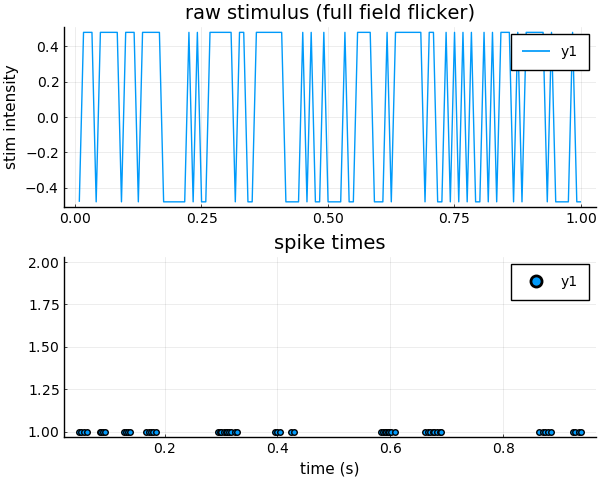

In [137]:
iiplot=1:120
ttplot=iiplot*dtStim
tspplot=tsp[(tsp.>=ttplot[1]).&(tsp.<ttplot[end])]
p1=plot(ttplot,Stim[iiplot],ylabel="stim intensity",title="raw stimulus (full field flicker)")
p2=plot(tspplot,fill(1,size(tspplot)),seriestype = :scatter,xlabel="time (s)",title="spike times")
plot(p1,p2,layout=(2,1))

In [139]:
tbins=(.5:1:nT)*dtStim

0.0041703025:0.008340605:1201.4683205524998

InterruptException: InterruptException: